In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
from nltk.corpus import wordnet, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

In [2]:
data = pd.read_csv(r"D:\my_projects\twitter-sentiment-analysis\data\main_data\main_data.csv")
data.shape

(1000, 4)

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    4
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.drop(["2401","Borderlands"],axis=1, inplace=True)

In [7]:
data["im getting on borderlands and i will murder you all ,"][55]

'Why, like everyone else in the border countries, have your hair fallen off, have you not heard that you are stupid aliens?'

In [8]:
data.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [9]:
data.rename({"Positive": "emotion", "im getting on borderlands and i will murder you all ,": "message"}, axis=1, inplace=True)

In [10]:
data["emotion"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

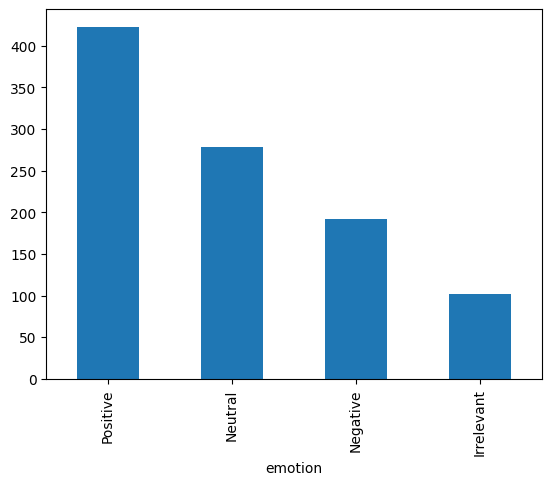

In [11]:
data["emotion"].value_counts().plot.bar();

In [12]:
data[data["emotion"] == "Positive"]

,emotion,message
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
995,Positive,Who's down for some @Borderlands on
996,Positive,Who's on for some @ Borderlands
997,Positive,Who's at @ Borderlands
998,Positive,Who's down with some @Borderlands on


In [13]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^A-Za-z\s]', '', text)
    text = text.lower()
    text = str(TextBlob(text).correct())
    return text

In [15]:
data["message"] = data["message"].apply(clean_text)

In [16]:
data.head()

,emotion,message
0,Positive,i am coming to the borders and i will kill you...
1,Positive,in getting on borderlands and i will kill you all
2,Positive,in coming on borderlands and i will murder you...
3,Positive,in getting on borderlands and i will murder y...
4,Positive,in getting into borderlands and i can murder y...


In [17]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return " ".join(filtered_tokens)

In [18]:
data["message"] = data["message"].apply(remove_stopwords)

In [19]:
data.head()

,emotion,message
0,Positive,coming borders kill
1,Positive,getting borderlands kill
2,Positive,coming borderlands murder
3,Positive,getting borderlands murder
4,Positive,getting borderlands murder


In [25]:
data.emotion.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["emotion"] = le.fit_transform(data["emotion"])

In [31]:
data["emotion"].unique()

array([3, 2, 1, 0])

In [77]:
tfidf_vc = TfidfVectorizer(max_features=1000)
X = tfidf_vc.fit_transform(data["message"]).toarray()
with open(r"D:\my_projects\twitter-sentiment-analysis\models\tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vc, f)

In [78]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
y = data["emotion"].values

In [37]:
y[:100]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
with open(r"D:\my_projects\twitter-sentiment-analysis\models\rf_model_sentiment_analysis.pkl", "wb") as f:
    pickle.dump(rf, f)

In [46]:
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94

In [88]:

def new_data_predictions(new_data):
    cl_new_data = clean_text(new_data)
    st_new_data = remove_stopwords(cl_new_data)
    with open(r"D:\my_projects\twitter-sentiment-analysis\models\tfidf_vectorizer.pkl", "rb") as f:
        tfidf_vcc = pickle.load(f)
    new_data_tfidf = tfidf_vcc.transform([st_new_data]).toarray()
    pred_emotion = rf.predict(new_data_tfidf)

    if pred_emotion[0] == 3:
        return "Positive"
    elif pred_emotion[0] == 2:
        return "Negative"
    elif pred_emotion[0] == 1:
        return "Neutral"
    else:
        return "Irrelevant"

In [96]:
new_data = "I am coming to the borders and I will kill you..."
output = new_data_predictions(new_data)

In [97]:
output

'Positive'